Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Anurag Singh Negi"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot
%matplotlib inline
import pandas_datareader.data as web
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = ""

In [3]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date
#amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

### Option 2 - Using Yahoo Finance `fix_yahoo_finance` library

In [4]:
## Assignment Task 1 : As part of the setup to download the stock data yahoo finance and pandas datareader were installed.
#                      I chose yahoo finance as the data available was latest and much easier to extract compared to Quandal.   


import yfinance as yf
from pandas_datareader import data as pdr
# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()



In [5]:
# 2) Using fix_yahoo_finance library only to download AMZN data
amzn = pdr.get_data_yahoo('AMZN', start = '2015-03-01', end = '2020-02-29')

[*********************100%***********************]  1 of 1 completed


In [6]:
## Assignment Task 2 : A list was created of all the stocks for which the data was needed to be downloaded for the
#                     past 60 months. As the last month data was availabel tilll Feb 2020 the start time for the data was
#                     selected to be 2015-03-01 for a total of 60 months.
#                     After which only the "Adj Close" prices were selected for each of the data into a seperate dataframe.


# If we want to download multipe stocks into a single dataframe:
all_stocks_list = ['AMZN', 'FB', 'IBM', 'MMM']
all_stocks = yf.download(all_stocks_list, start = '2015-03-01', end = '2020-02-29')
stocks_data_adj_close= all_stocks['Adj Close']
stocks_data_adj_close.head()


[*********************100%***********************]  4 of 4 completed


,AMZN,FB,IBM,MMM
Date,,,,
2015-03-02,385.660004,79.750000,128.879242,148.555832
2015-03-03,384.609985,79.599998,129.320953,146.612823
2015-03-04,382.720001,80.900002,128.027969,145.645706
2015-03-05,387.829987,81.209999,129.441391,146.002914
2015-03-06,380.089996,80.010002,127.289124,143.206085


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-03-31 to 2020-02-28
Freq: BM
Data columns (total 4 columns):
AMZN    60 non-null float64
FB      60 non-null float64
IBM     60 non-null float64
MMM     60 non-null float64
dtypes: float64(4)
memory usage: 2.3 KB


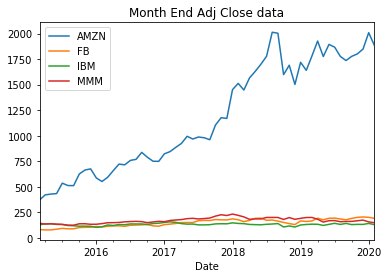

In [7]:
## Assignment Task 3 : To select the month end data we are using the frequence set to BM (business month end)
#                     We notice that 30th Feb 2018 is business month end as per the function but as its an exchange 
#                     holiday in US for Good friday we don't have any data for it. As there is no stocks data 
#                     Available for 30th March we are using the value of 29th March data as the business month 
#                     end data for March 2018.
#               

stocks_data_adj_close_freq = stocks_data_adj_close.asfreq(freq='BM')
stocks_data_adj_close_month_end =  stocks_data_adj_close_freq.fillna(stocks_data_adj_close.loc['2018-03-29'])
stocks_data_adj_close_month_end.info();
stocks_data_adj_close_month_end.plot(title='Month End Adj Close data');


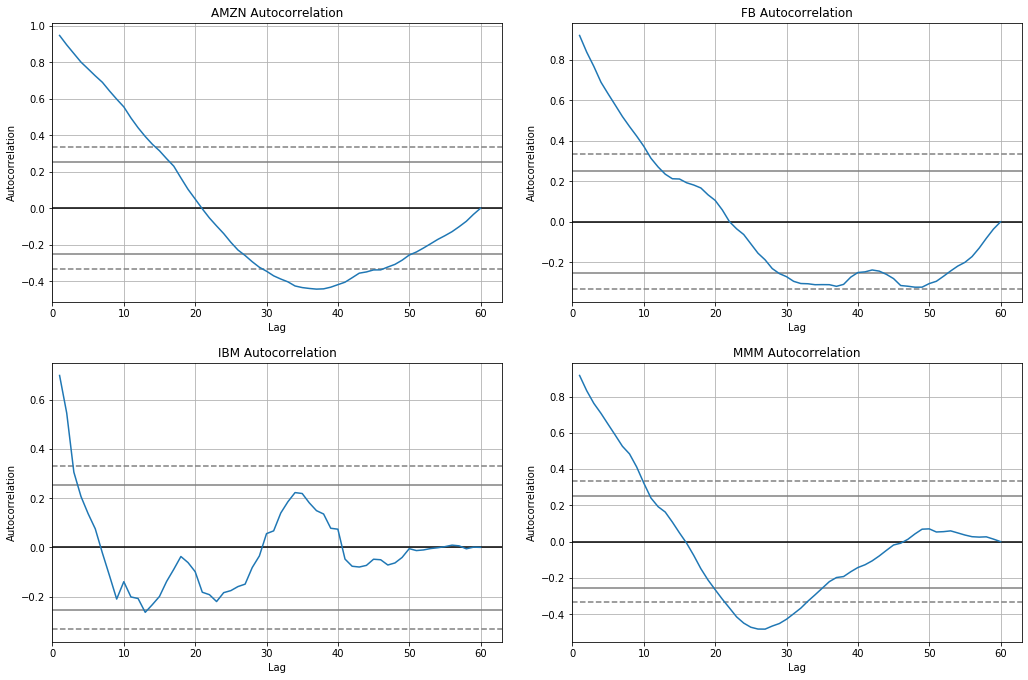

In [8]:
## Assignment Task 4 : Below are the details on the details on the Autocorrelation for each of the Stocks
#
#               AMZN : For the AMZN month end adjested stocks we see that there is strong positive correlation (1-0.7)
#                       for the lags 1 till 7 which means that for the lag period which ever direction the data moves
#                       up or down it will continue to do for 7 periods.
#                       For the lags from 8 till 14 we see medium positive correlation(0.7-0.3) and from 15 to 29 and 
#                        from 47 to 60 (0.3 to -0.3)no correlation.
#                       For 29 to 16 we see medium negative correlation meaning which ever direction the data is moving it
#                        it will go in opposite direction for next time period.
#
#
#               FB : For the FB monthe end adjested stocks we see that there is strong positive correlation (1-0.7)
#                       for the lags 1 till 3 which means that for the lag period which ever direction the data moves
#                       up or down it will continue to do for 7 periods.
#                      For the lags 4 till 11 we see medium positive correlation(from 0.7 to 0.3) and for all the 
#                       lags higher than 11 we don't see any correlation(from 0.3 to -0.3).
#
#
#               IBM : For the IBM month end adjested stocks we see that there is no strong positive correlation (1-0.7)
#                     and for the lags 1 till 3 see medium positive correlation and for all the ;ags higher than 3 till 
#                     60 there is no correlation.
#
#
#               MMM : For the MMM month end adjested stocks we see that there is strong positive correlation (1-0.7)
#                       for the lags 1 till 4 which means that for the lag period which ever direction the data moves
#                       up or down it will continue to do for 4 periods.
#                      For the lags 5 till 10 we see medium positive correlation (0.7-0.3) and from 
#                       10 to 21 and from 34 to 60 no correlation (from 0.3 to -0.3).
#                       For 21 to 33 lag we see medium negative correlation.
#                 
#
#
#
## TYPE YOUE CODE BELOW
fig,axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2)
plt.tight_layout(pad=4)
#axes[0,0].set_xlim(xmin=0);
autocorrelation_plot(stocks_data_adj_close_month_end['AMZN'], ax=axes[0,0])
autocorrelation_plot(stocks_data_adj_close_month_end['FB'], ax=axes[0,1])
autocorrelation_plot(stocks_data_adj_close_month_end['IBM'], ax=axes[1,0])
autocorrelation_plot(stocks_data_adj_close_month_end['MMM'], ax=axes[1,1])
axes[0,0].set_xlim(xmin=0);
axes[0,1].set_xlim(xmin=0);
axes[1,0].set_xlim(xmin=0);
axes[1,1].set_xlim(xmin=0);
axes[0,0].set_title('AMZN Autocorrelation');
axes[0,1].set_title('FB Autocorrelation');
axes[1,0].set_title('IBM Autocorrelation');
axes[1,1].set_title('MMM Autocorrelation');


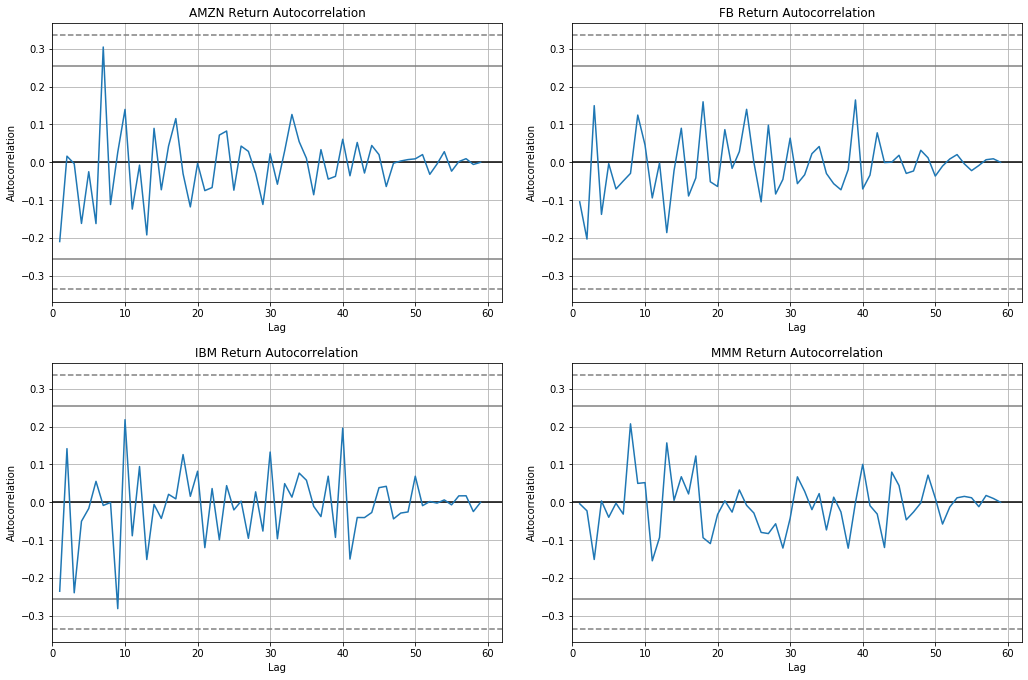

In [9]:
## Assignment Task 5 : The return has been calculated for all the stocks by creating a new column by shifting the 
#                      column by one index and then subtracting the previous month end adjusted close from the current
#                      month ends adjected close price for the stocks. 
#                       
#                     After plotting the auto correlation for the month return we see that for all stocks there is
#                      no autocorrelation as for all lags the value of autocorrelation is between 0.3 to -0.3 so it seems
#                      the future return value can't be predicted based on the current data for month end return.


stocks_data_adj_close_month_end['AMZN_prev_month']= stocks_data_adj_close_month_end['AMZN'].shift(1)
stocks_data_adj_close_month_end['FB_prev_month']= stocks_data_adj_close_month_end['FB'].shift(1)
stocks_data_adj_close_month_end['IBM_prev_month']= stocks_data_adj_close_month_end['IBM'].shift(1)
stocks_data_adj_close_month_end['MMM_prev_month']= stocks_data_adj_close_month_end['MMM'].shift(1)

stocks_data_adj_close_month_end['AMZN_return']= stocks_data_adj_close_month_end['AMZN'] - stocks_data_adj_close_month_end['AMZN_prev_month']
stocks_data_adj_close_month_end['FB_return']= stocks_data_adj_close_month_end['FB'] - stocks_data_adj_close_month_end['FB_prev_month']
stocks_data_adj_close_month_end['IBM_return']= stocks_data_adj_close_month_end['IBM'] - stocks_data_adj_close_month_end['IBM_prev_month']
stocks_data_adj_close_month_end['MMM_return']= stocks_data_adj_close_month_end['MMM'] - stocks_data_adj_close_month_end['MMM_prev_month']

stocks_data_adj_close_month_end_return = stocks_data_adj_close_month_end[['AMZN_return','FB_return','IBM_return','MMM_return']].dropna()
stocks_data_adj_close_month_end_return
#stocks_data_adj_close_month_end_return;

fig,axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2)
plt.tight_layout(pad=4)
#axes[0,0].set_xlim(xmin=0);
autocorrelation_plot(stocks_data_adj_close_month_end_return['AMZN_return'], ax=axes[0,0])
autocorrelation_plot(stocks_data_adj_close_month_end_return['FB_return'], ax=axes[0,1])
autocorrelation_plot(stocks_data_adj_close_month_end_return['IBM_return'], ax=axes[1,0])
autocorrelation_plot(stocks_data_adj_close_month_end_return['MMM_return'], ax=axes[1,1])
axes[0,0].set_xlim(xmin=0);
axes[0,1].set_xlim(xmin=0);
axes[1,0].set_xlim(xmin=0);
axes[1,1].set_xlim(xmin=0);
axes[0,0].set_title('AMZN Return Autocorrelation');
axes[0,1].set_title('FB Return Autocorrelation');
axes[1,0].set_title('IBM Return Autocorrelation');
axes[1,1].set_title('MMM Return Autocorrelation');

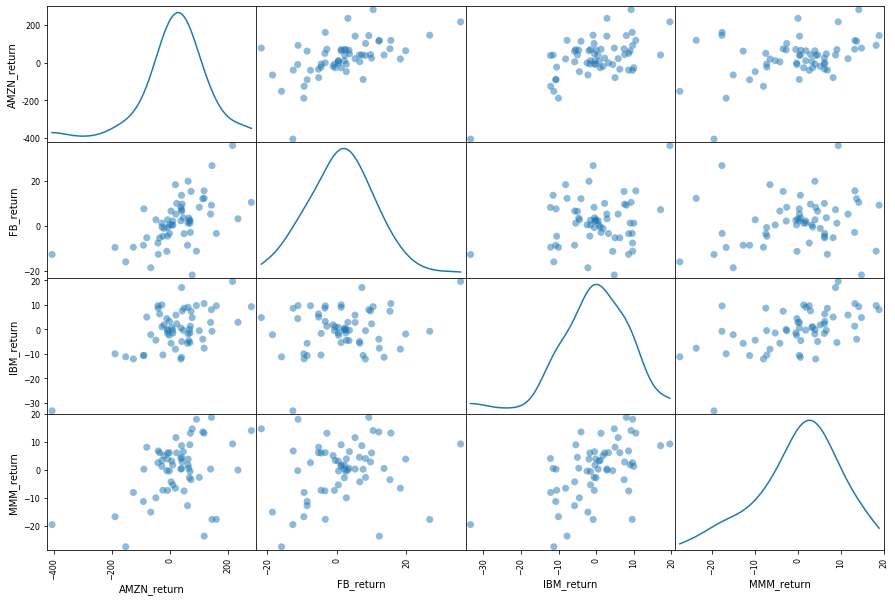

In [10]:
## Assignment Task 6 : We have created a single dataframe stocks_data_adj_close_month_end_return for the month
#                       end return values of all the stocks
#
#                   From the scatter matrix plot we see that there is slight correlation between AMZN and FB
#                    returns as we see both the stocks returns tend to move upward.
#                    Additionally we also see slight correlation between the retuns for IBM and MMM
#
#
#
#
pd.plotting.scatter_matrix(stocks_data_adj_close_month_end_return, figsize=(15,10),diagonal='kde', s=200);